# Домашнее задание по разделу EDA4

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.

Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

## Объедините 2 массива в DataFrame

In [3]:
data_dict = {'Петербург': petersburg, 'Магадан': magadan}
df = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in data_dict.items() ]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Петербург  7 non-null      float64
 1   Магадан    8 non-null      float64
dtypes: float64(2)
memory usage: 256.0 bytes


In [4]:
# даннх по мидиям из Петербурга меньше на одно значение, которое заменим на среднее значение по выборке
df.iloc[7]['Петербург'] = df['Петербург'].mean()
df

,Петербург,Магадан
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


## Обоснуйте выбор теста на корреляцию.

Для выбора теста на корреляцию необходимо проверить как распределены данные, и есть ли между размерами раковин мидий из Петербурга линейная связь с размерами раковин мидй из Магадана.

1) если данные нормально распределены, и есть линейная связь между ними, тогда выбираем корреляция Пирсона

2) если данные распределены не нормально, или связь между выборками не линейна, тогда используем корреляцию Спирмена (или корреляцию Кендалла)

Сначала проверим как распределены данные:

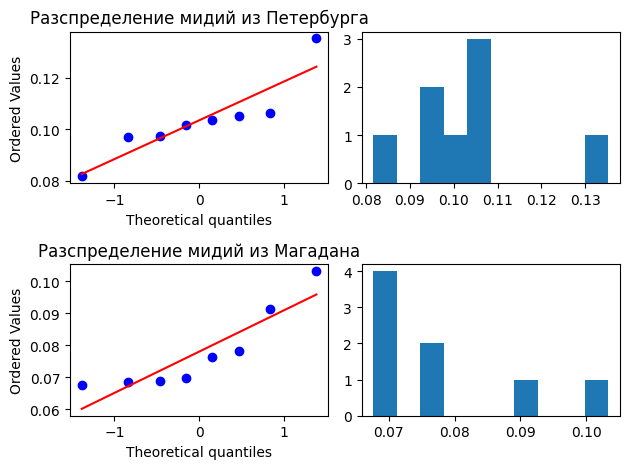

In [5]:
ax1 = plt.subplot(2, 2, 1)
stats.probplot(df['Петербург'], plot=plt)
ax1.set_title('Разспределение мидий из Петербурга')

plt.subplot(2, 2, 2)
plt.hist(df['Петербург'])

ax2 = plt.subplot(2, 2, 3)
stats.probplot(df['Магадан'], plot=plt)
ax2.set_title('Разспределение мидий из Магадана')

plt.subplot(2, 2, 4)
plt.hist(df['Магадан'])

plt.tight_layout()
plt.show()

Вывод: графики Q-Q plot и гистограмма для каждого признака показывает, что данные не распределены нормально, и мы не можем использовать корреляцию Пирсона.

Проведем дополнительный тест на нормальность - тест Шапиро-Уилка:

In [6]:
from scipy.stats import shapiro

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

# уровень значимости
alpha = 0.05

_, p = shapiro(df)
print('p=%.3f' % p)

# Интерпретация

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.100
Данные распределены нормально


Вывод: получили результат, противоречащий визуальному анализу. Возможно, из-за того, что данных очень мало, поэтому визульно они не распределены нормально.

Проведем еще один тест на нормальность - тест Д’Агостино:

In [9]:
from scipy.stats import normaltest

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

# уровень значимости
alpha = 0.05

_, p = normaltest(df)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация
if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)


p=0.042
p:  [0.04229036 0.15427618]
Данные распределены нормально


/Users/moskalen/Documents/mine/IDE/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Петербург,Магадан
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


Вывод: оба теста показывают, что данне распределены нормально, поэтому можно использовать корреляцию Пирсона.

<AxesSubplot: >

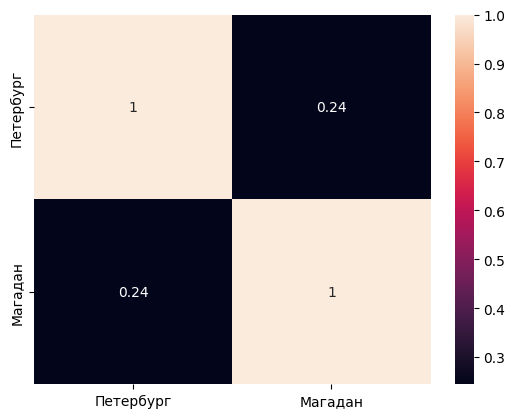

In [12]:
# Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.
sns.heatmap(data=df.corr(), annot=True)


Вывод: коэффициент корреляции 0.24 < 0.3 говорит об отсутствии или очень слабой связи.

# Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.

На данном этапе известна следующая информация:
1) данные распределены по нормальному закону
2) зависимая переменная (размер мидии) - количественная
3) сравниваем две группы: мидии из Петербурга и мидии из Магадана
4) группы из разных совокупностей: одни - из Петербурга, другие - из Магадана
5) в каждой выборке меньше 30 значений

Исходя из этого приходим к заключению, что следует использовать независимый t-тест.

In [9]:
# Сделаем независимый t-test для сравнения средних размеров мидий в зависимости от города-производителя

from scipy.stats import ttest_ind

H0 = 'Нет значимой разницы между размерами мидий из разных городов.'
Ha = 'Есть значимая разница между размерами мидий из разных городов.'
alpha = 0.05

def t_test(a, b):
    print("\n*** Результаты незвисимого t-теста: ***")

    result = ttest_ind(a, b, equal_var=True)
    p = round(result[1], 3)

    if p > alpha:
        print(f"{p} > {alpha}. Мы не может отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df['Петербург'], df['Магадан'])


*** Результаты незвисимого t-теста: ***
0.003 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между размерами мидий из разных городов.


In [13]:
# находим различия средних значений
means = df.mean()
print("Среднее значение мидий из Петербурга: ", means['Петербург'])
print("Среднее значение мидий из Магадана: ", means['Магадан'])
print("Разнизца: ", means['Петербург'] - means['Магадан'])


Среднее значение мидий из Петербурга:  0.10344285714285714
Среднее значение мидий из Магадана:  0.0780125
Разнизца:  0.025430357142857143


Вывод: есть значимая разница (p=.003) между мидиями из Петербурга и Магадана. Cреднее значение размеров мидий из Петербурга больше среднего значения размеров мидий из Магадана на 0.025.